Importing all the needed dependencies

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Collecting Data and analysing

In [5]:
ins_data_path = '/content/insurance.csv'
ins_dataset = pd.read_csv(ins_data_path)

In [6]:
ins_dataset.head()    #shows the 1st 5 rows of the insurance dataset

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
 ins_dataset.shape #no. of rows and columns

(1338, 7)

In [8]:
ins_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
ins_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [10]:
ins_dataset.describe() #describing the dataset

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


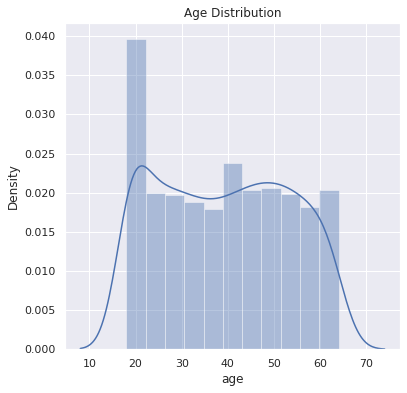

In [11]:
#distribution of age

sns.set()
plt.figure(figsize = (6,6))
sns.distplot(ins_dataset['age'])
plt.title('Age Distribution')
plt.show()


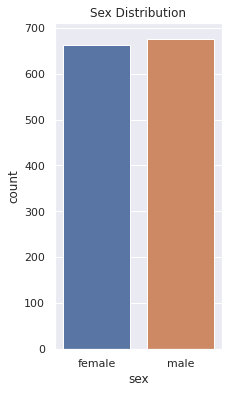

In [12]:
#Gender Column

plt.figure(figsize=(3,6))
sns.countplot(x='sex', data=ins_dataset)
plt.title('Sex Distribution')
plt.show()

In [13]:
#Gender Stats

ins_dataset['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


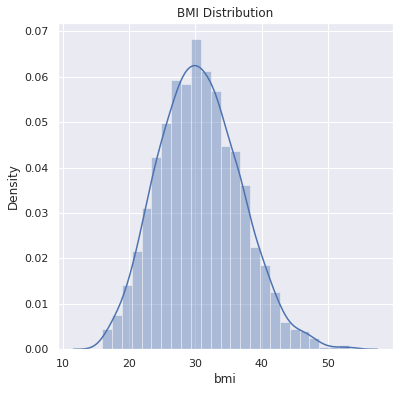

In [14]:
#BMI Distribution

plt.figure(figsize = (6,6))
sns.distplot(ins_dataset['bmi'])
plt.title('BMI Distribution')
plt.show()


Healthy BMI range is **18.5 to 24.9**

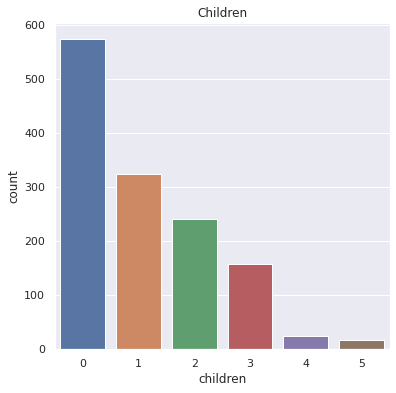

In [15]:
#children column

plt.figure(figsize=(6,6))
sns.countplot(x='children', data = ins_dataset)
plt.title('Children')
plt.show()


In [16]:
#children Stats

ins_dataset['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

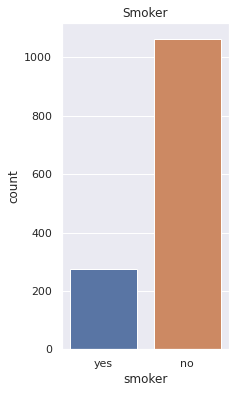

In [17]:
#smoker Column

plt.figure(figsize=(3,6))
sns.countplot(x='smoker', data=ins_dataset)
plt.title('Smoker')
plt.show()

In [18]:
#Smoker Stats

ins_dataset['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

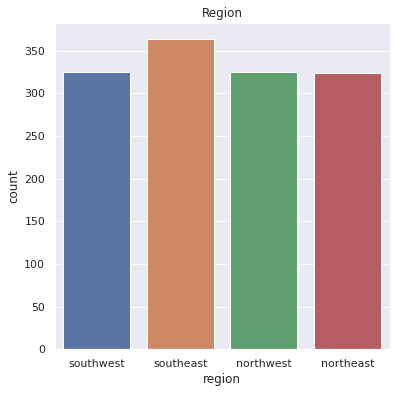

In [19]:
#region column

plt.figure(figsize = (6,6))
sns.countplot(x='region', data=ins_dataset)
plt.title('Region')
plt.show()

In [20]:
#Region stats

ins_dataset['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


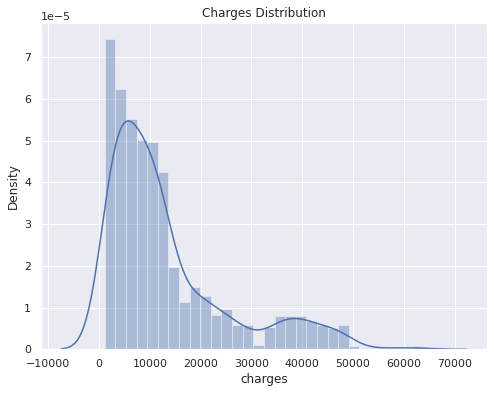

In [21]:
# Distribution of Charge Values

plt.figure(figsize=(8,6))
sns.distplot(ins_dataset['charges'])
plt.title('Charges Distribution')
plt.show()

Data Pre-processing

Encoding the categorical features (Sex, smoker, region)

In [22]:
#encoding sex column
ins_dataset.replace({'sex':{'male':0, 'female':1}}, inplace = True)

#encoding smoker column
ins_dataset.replace({'smoker':{'yes':0, 'no':1}}, inplace=True)

#encoding region column
ins_dataset.replace({'region':{'southeast':0, 'southwest':1, 'northeast':2, 'northwest':3 }}, inplace = True)


Splitting the features and targets

In [23]:
X = ins_dataset.drop(columns='charges', axis = 1)
Y = ins_dataset['charges']

In [24]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [25]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


Splitting the data into training data and testing data

In [26]:

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)


In [27]:
print(X.shape, X_train.shape, X_test.shape)


(1338, 6) (1070, 6) (268, 6)


**Training the Model**

Linear Regression

In [28]:
# loading the linear regression model

reg = LinearRegression()

In [29]:
reg.fit(X_train, Y_train)

LinearRegression()

Model Evaluation

In [30]:
#prediction on training data

training_data_prediction = reg.predict(X_train)

In [31]:
# R squared value

r2_train= metrics.r2_score(Y_train, training_data_prediction)
print('R Squared value: ', r2_train)

R Squared value:  0.751505643411174


In [32]:
#prediction on test data

test_data_prediction = reg.predict(X_test)

In [33]:
# R squared value
r2_test = metrics.r2_score(Y_test, test_data_prediction)
print('R Squared Value: ', r2_test)

R Squared Value:  0.7447273869684077


**Building a Predictive System**

We are taking input in the form of input_data variable which stores a tuple

In [35]:
#input data = (31, female, 25.74, 0, no, southeast)
#input data = (34, male, 23.00, 0, yes, northeast)

input_data = (34,0,23.00,0,1,2)

#changing input data to a numpy array
input_data_arr = np.asarray(input_data)

#reshape array
input_data_reshaped = input_data_arr.reshape(1,-1)

prediction = reg.predict(input_data_reshaped)
print(prediction)

print('The insurance cost in USD', prediction[0],'\n\n')

[4006.65257918]
The insurance cost in USD 4006.6525791834592 




/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
